In [31]:
import psycopg2
try:
    dbConnection = psycopg2.connect(
    user = "dap",
    password = "dap",
    port = "5432",
    database = "dap_project")
    dbConnection.set_isolation_level(0) # AUTOCOMMIT
    dbCursor = dbConnection.cursor()
    #dbCursor.execute('CREATE DATABASE dap_project;')
    #print("Database created sucessfully in postgres")
except (Exception , psycopg2.Error) as dbError :
    print ("Error while connecting to PostgreSQL", dbError)

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
import csv
import pandas as pd
df= pd.read_csv("/Users/ganeshmore/Desktop/MSc/DAP/Datasets/tv_shows.csv",index_col=0)
print(df)

                    genre           production_company  vote_average  runtime  \
id                                                                              
2               Animation        Touchstone Television           7.0       30   
14                 Comedy         Zinkia Entertainment           5.0       25   
15                   Kids                         WQED           5.0       30   
18                 Comedy  20th Century Fox Television           6.0       25   
29                  Drama   TAT Communications Company           8.0       30   
...                   ...                          ...           ...      ...   
29904  Action & Adventure                      BBC One           9.0       30   
29950              Comedy                    SVT Drama           6.0       30   
29963              Comedy         Universal Television           0.0       60   
29964              Comedy          Lorimar Productions           0.0       30   
29989               Drama   

In [3]:
sql='''select * from tv_shows
;
'''
tvs = pd.read_sql(sql, dbConnection)
df_tv = pd.DataFrame(tvs)
print(df_tv)

         id               genre           production_company  vote_average  \
0         2           Animation        Touchstone Television           7.0   
1        14              Comedy         Zinkia Entertainment           5.0   
2        15                Kids                         WQED           5.0   
3        18              Comedy  20th Century Fox Television           6.0   
4        29               Drama   TAT Communications Company           8.0   
...     ...                 ...                          ...           ...   
3708  29904  Action & Adventure                      BBC One           9.0   
3709  29950              Comedy                    SVT Drama           6.0   
3710  29963              Comedy         Universal Television           0.0   
3711  29964              Comedy          Lorimar Productions           0.0   
3712  29989               Drama             Orion Television           7.0   

      runtime languages  
0          30        en  
1          

In [16]:
sql='''select count(id),genre from tv_shows group by genre order by count;'''
tvs = pd.read_sql(sql, dbConnection)
most_p_cpny = pd.DataFrame(tvs)
print(most_p_cpny)

    count               genre
0       1             History
1       1             Fantasy
2       2              Action
3      10               Music
4      23      War & Politics
5      24                News
6      35                Kids
7      56             Mystery
8      56                Talk
9      64                Soap
10     70             Western
11    110               Crime
12    127              Family
13    145    Sci-Fi & Fantasy
14    208             Reality
15    223         Documentary
16    301  Action & Adventure
17    473           Animation
18    857               Drama
19    927              Comedy


Text(0, 0.5, 'Number of Genre')

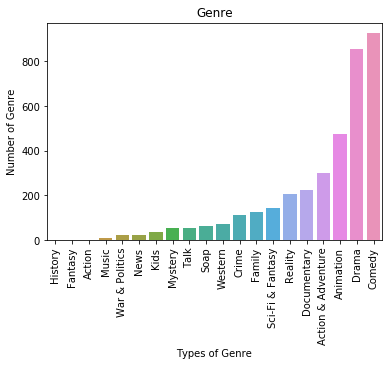

In [19]:
%matplotlib inline
sns.barplot(x='genre',y='count',data=most_p_cpny)
plt.xticks(rotation=90)
plt.title('Genre')
plt.xlabel('Types of Genre')
plt.ylabel('Number of Genre')

In [21]:
sql='''select count(id),languages from tv_shows group by languages order by count(id)desc limit 7;'''
tvs = pd.read_sql(sql, dbConnection)
top_lang = pd.DataFrame(tvs)
print(top_lang)

   count languages
0   3004        en
1    235        ja
2    107        es
3     72        fr
4     56        de
5     46        ko
6     28        pt


Text(0, 0.5, 'Number of TV_shows')

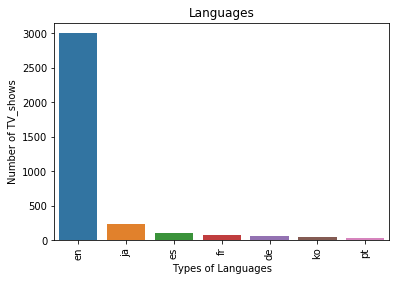

In [22]:
%matplotlib inline
sns.barplot(x='languages',y='count',data=top_lang)
plt.xticks(rotation=90)
plt.title('Languages')
plt.xlabel('Types of Languages')
plt.ylabel('Number of TV_shows')

Text(10.049999999999997, 0.5, 'Number of Languages')

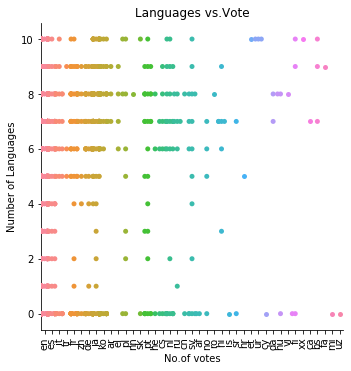

In [23]:
sns.catplot(x='languages',y='vote_average',kind = "swarm",data=df)
plt.xticks(rotation=90)
plt.title('Languages vs.Vote')
plt.xlabel('No.of votes')
plt.ylabel('Number of Languages')

In [7]:
sql='''select count(languages),production_company from tv_shows group by production_company order by count(languages)desc limit 7;'''
tvs = pd.read_sql(sql, dbConnection)
top_pro = pd.DataFrame(tvs)
print(top_pro)

   count           production_company
0    126                          BBC
1    118         Universal Television
2    105      Warner Bros. Television
3     72    Hanna-Barbera Productions
4     58         Paramount Television
5     41  20th Century Fox Television
6     38                     Televisa


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

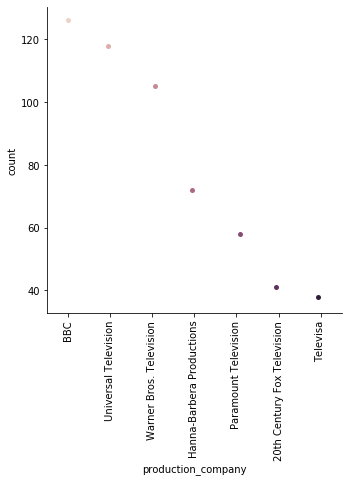

In [95]:
sns.catplot(x='production_company',y='count',palette='ch:.1',data=top_pro)
plt.xticks(rotation=90)

In [85]:
sql='''
select count(id),vote_average from tv_shows group by vote_average;'''
movies = pd.read_sql(sql, dbConnection)
voting = pd.DataFrame(movies)
print(voting)

    count  vote_average
0     743           8.0
1     400           6.0
2     155           5.0
3     191           9.0
4      22           2.0
5      34           3.0
6     129          10.0
7    1169           0.0
8     769           7.0
9      33           1.0
10     68           4.0


In [12]:
size=top_pro['production_company']
size

0                            BBC
1           Universal Television
2        Warner Bros. Television
3      Hanna-Barbera Productions
4           Paramount Television
5    20th Century Fox Television
6                       Televisa
Name: production_company, dtype: object

In [13]:
lable=top_pro['count']
lable

0    126
1    118
2    105
3     72
4     58
5     41
6     38
Name: count, dtype: int64

In [29]:
import csv
import pandas as pd
df= pd.read_csv("/Users/ganeshmore/Desktop/MSc/DAP/Datasets/tv_shows.csv",index_col=0)
print(df)
df.head(0)
#plt.scatter(X, y, color='blue')
#plt.xlabel('x-axis')
#plt.ylabel('y-axis')
#plt.title('Plot Title')
#plt.show()

                    genre           production_company  vote_average  runtime  \
id                                                                              
2               Animation        Touchstone Television           7.0       30   
14                 Comedy         Zinkia Entertainment           5.0       25   
15                   Kids                         WQED           5.0       30   
18                 Comedy  20th Century Fox Television           6.0       25   
29                  Drama   TAT Communications Company           8.0       30   
...                   ...                          ...           ...      ...   
29904  Action & Adventure                      BBC One           9.0       30   
29950              Comedy                    SVT Drama           6.0       30   
29963              Comedy         Universal Television           0.0       60   
29964              Comedy          Lorimar Productions           0.0       30   
29989               Drama   

,genre,production_company,vote_average,runtime,languages
id,,,,,


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text xticklabel objects>)

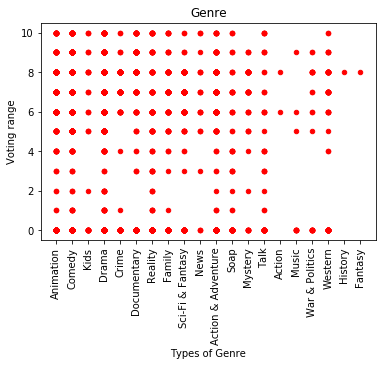

In [30]:
df.plot(kind='scatter',x='genre',y='vote_average',color='red')
plt.title('Genre')
plt.xlabel('Types of Genre')
plt.ylabel('Voting range')
plt.xticks(rotation=90)